# 机器学习实验2：还是线性回归
regress_data1.csv是人口数据集，其中有1个输入变量（人口数量）和输出变量（收益）
要求利用线性回归模型拟合人口数据样本，并可视化回归的结果

In [1]:
# 导库
import numpy as np
import numpy.linalg
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 读取文件
csv_data = pd.read_csv('dataset/regress_data1.csv', header=0)       # 用pandas读取csv文件
print(csv_data)

         人口        收益
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]


In [3]:
# 获取数据
csv_population = csv_data['人口']                                     # 人口
csv_money = csv_data['收益']                                          # 收益
population = np.array(csv_population)                                # 转换成数组形式
money = np.array(csv_money)                                          # 转换成数组形式
print('Population: \n', population)
print('Money: \n', money)

Population: 
 [ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
Money: 
 [17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.76

In [4]:
# 实现矩阵的增广
one = np.ones(97)                                                   # 全一向量，用于乘以常量参数
x_b = np.c_[one.T, population]                                      # 利用np.c_函数，横向拼接两个矩阵

In [5]:
# 求拟合函数的权重：最小二乘法
pinv = numpy.linalg.pinv(np.dot(x_b.T, x_b))                        # 求伪逆
w = np.dot(np.dot(pinv, x_b.T), money)                              # 求权重

In [6]:
# 求拟合函数
y_predict = np.dot(w, x_b.T)                                        # 预测值

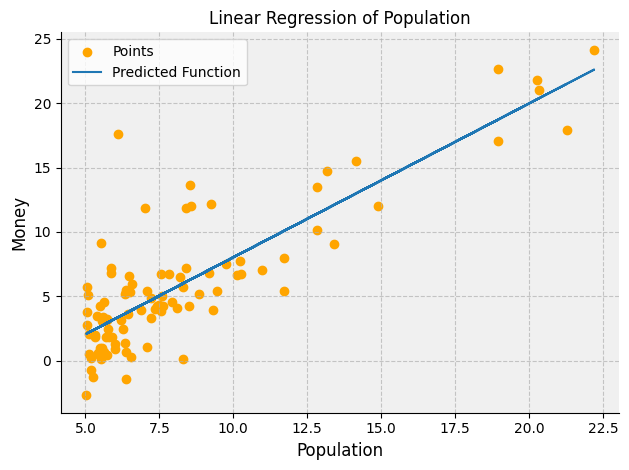

In [7]:
# 可视化
fig, ax = plt.subplots()                                            # 建画布
ax.scatter(population, money, color='orange')                       # 绘制散点
ax.plot(population, y_predict)                                      # 绘制函数
ax.legend(['Points', 'Predicted Function'])                         # 添加图例
ax.set_xlabel('Population', fontsize=12)                            # 横坐标标签
ax.set_ylabel('Money', fontsize=12)                                 # 纵坐标标签
ax.set_title('Linear Regression of Population')                     # 设置图表标题
ax.tick_params(which='major', labelsize=10)                         # 设置刻度标签大小
ax.grid(True, linestyle='--', alpha=0.7)                            # 添加网格线
ax.set_facecolor('#f0f0f0')                                         # 设置背景颜色
plt.tight_layout()                                                  # 调节位置，美化图像
plt.show()                                                          # 显示图像